In [111]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Strategy: esas_only

In [112]:
from dropout_prediction.src.features import preprocess

preprocess_args =         {
        "state": "train",
        "strategy": "esas_only",
        "memory" : 0 
    }

preprocessed_dict = preprocess.preprocess(**preprocess_args)


train
11 rows removed. This corresponds to 0.42275172943889316%
(2591,) (2591,) (2591, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2591 entries, 0 to 2601
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   esas_dst_kode                         2591 non-null   int64 
 1   esas_rolle                            2591 non-null   int64 
 2   esas_by                               2591 non-null   object
 3   esas_postnummer                       2591 non-null   int64 
 4   esas_uddannelsestype                  2591 non-null   int64 
 5   esas_cpr_personstatus                 2591 non-null   int64 
 6   esas_studiestart_week                 2591 non-null   UInt32
 7   esas_forventet_afslutning_week        2591 non-null   UInt32
 8   esas_forventet_afslutning_study_year  2591 non-null   UInt32
dtypes: UInt32(3), int64(5), object(1)
memory usage: 179.6+ KB
None


DK    2587
GL       4
Name: esas_iso2, dtype: int64


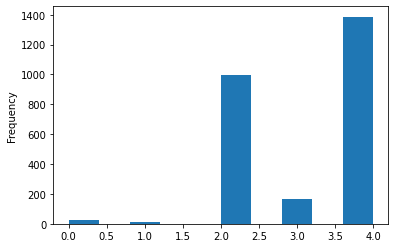

In [107]:
feats = preprocessed_dict["features"]
feats['esas_forventet_afslutning_study_year'].plot.hist()
print(feats['esas_iso2'].value_counts(dropna=False))



In [113]:
feats

esas_dst_kode  esas_rolle esas_iso2     esas_by  esas_postnummer  \
0              5627   742980000        DK   Svendborg             5700   
1              5444   742980000        DK      Årslev             5792   
2              5558   742980000        DK  Fredericia             7000   
3              5440   742980000        DK    Odense C             5000   
4              5444   742980000        DK     Kolding             6000   
...             ...         ...       ...         ...              ...   
2597           5158   742980000        DK    Odense S             5260   
2598           5166   742980000        DK    Odense C             5000   
2599           5558   742980000        DK   Odense NØ             5240   
2600           5440   742980000        DK      Korsør             4220   
2601           5166   742980000        DK    Aarhus V             8210   

      esas_uddannelsestype  esas_cpr_personstatus  esas_studiestart_week  \
0                742980000              742980001                     35   
1                742980000              742980001                     35   
2                742980000              742980001                     35   
3                742980000              742980001                     35   
4                742980000              742980001                     35   
...                    ...                    ...                    ...   
2597             742980000              742980001                     35   
2598             742980000              742980001                     35   
2599             742980000              742980001                     35   
2600             742980000              742980001                     35   
2601             742980000              742980001                     35   

      esas_forventet_afslutning_week  esas_forventet_afslutning_study_year  
0                                 26                                     2  
1                                  5                                     4  
2                                 26                                     2  
3                                 27                                     4  
4                                  5                                     4  
...                              ...                                   ...  
2597                               5                                     4  
2598                               5                                     4  
2599                              26                                     2  
2600                              27                                     4  
2601                               5                                     4  

[2591 rows x 10 columns]

In [103]:
feats[feats.isna().any(axis=1)]

Empty DataFrame
Columns: [esas_dst_kode, esas_rolle, esas_iso2, esas_by, esas_postnummer, esas_uddannelsestype, esas_cpr_personstatus, esas_studiestart_week, esas_forventet_afslutning_week, esas_forventet_afslutning_study_year]
Index: []

In [126]:
[n for n in feats.columns if feats[n].dtype == object]


['esas_iso2', 'esas_by']

In [130]:
import pandas as pd
pd.get_dummies(feats)

esas_dst_kode  esas_rolle  esas_postnummer  esas_uddannelsestype  \
0              5627   742980000             5700             742980000   
1              5444   742980000             5792             742980000   
2              5558   742980000             7000             742980000   
3              5440   742980000             5000             742980000   
4              5444   742980000             6000             742980000   
...             ...         ...              ...                   ...   
2597           5158   742980000             5260             742980000   
2598           5166   742980000             5000             742980000   
2599           5558   742980000             5240             742980000   
2600           5440   742980000             4220             742980000   
2601           5166   742980000             8210             742980000   

      esas_cpr_personstatus  esas_studiestart_week  \
0                 742980001                     35   
1                 742980001                     35   
2                 742980001                     35   
3                 742980001                     35   
4                 742980001                     35   
...                     ...                    ...   
2597              742980001                     35   
2598              742980001                     35   
2599              742980001                     35   
2600              742980001                     35   
2601              742980001                     35   

      esas_forventet_afslutning_week  esas_forventet_afslutning_study_year  \
0                                 26                                     2   
1                                  5                                     4   
2                                 26                                     2   
3                                 27                                     4   
4                                  5                                     4   
...                              ...                                   ...   
2597                               5                                     4   
2598                               5                                     4   
2599                              26                                     2   
2600                              27                                     4   
2601                               5                                     4   

      esas_iso2_DK  esas_iso2_GL  ...  esas_by_Vissenbjerg  esas_by_Viuf  \
0                1             0  ...                    0             0   
1                1             0  ...                    0             0   
2                1             0  ...                    0             0   
3                1             0  ...                    0             0   
4                1             0  ...                    0             0   
...            ...           ...  ...                  ...           ...   
2597             1             0  ...                    0             0   
2598             1             0  ...                    0             0   
2599             1             0  ...                    0             0   
2600             1             0  ...                    0             0   
2601             1             0  ...                    0             0   

      esas_by_Vojens  esas_by_Vordingborg  esas_by_Værløse  esas_by_Årre  \
0                  0                    0                0             0   
1                  0                    0                0             0   
2                  0                    0                0             0   
3                  0                    0                0             0   
4                  0                    0                0             0   
...              ...                  ...              ...           ...   
2597               0                    0                0             0   
2598      